<a href="https://colab.research.google.com/github/blaw5/dlwpt-code/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [1]:
import torch 
import cv2
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [3]:
from PIL import Image
img1 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo (1).jpg")
img2 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo (2).jpg")
img3 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo (3).jpg")
img4 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo (4).jpg")
img5 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo.jpg")

In [4]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [ ]:
img2

In [5]:
img_t1 = preprocess(img1)
img_t2 = preprocess(img2)
img_t3 = preprocess(img3)
img_t4 = preprocess(img4)
img_t5 = preprocess(img5)

In [6]:
batch_t1 = torch.unsqueeze(img_t1, 0)
batch_t2 = torch.unsqueeze(img_t2, 0)
batch_t3 = torch.unsqueeze(img_t3, 0)
batch_t4 = torch.unsqueeze(img_t4, 0)
batch_t5 = torch.unsqueeze(img_t5, 0)

In [ ]:
resnet.eval()

In [8]:
out1 = resnet(batch_t1).cpu()
out2 = resnet(batch_t2).cpu()
out3 = resnet(batch_t3).cpu()
out4 = resnet(batch_t4).cpu()
out5 = resnet(batch_t5).cpu()

In [9]:
with open('../content/drive/MyDrive/ColabNotebooks/data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [10]:
_, index1 = torch.max(out1, 1)
_, index2 = torch.max(out2, 1)
_, index3 = torch.max(out3, 1)
_, index4 = torch.max(out4, 1)
_, index5 = torch.max(out5, 1)

In [11]:
percentage1 = torch.nn.functional.softmax(out1, dim=1)[0] * 100
labels[index1[0]], percentage1[index1[0]].item()



('valley, vale', 53.24588394165039)

In [12]:
percentage2 = torch.nn.functional.softmax(out2, dim=1)[0] * 100
labels[index2[0]], percentage2[index2[0]].item()



('seashore, coast, seacoast, sea-coast', 43.04222869873047)

In [13]:
percentage3 = torch.nn.functional.softmax(out3, dim=1)[0] * 100
labels[index3[0]], percentage3[index3[0]].item()



('kite', 99.94131469726562)

In [14]:
percentage4 = torch.nn.functional.softmax(out4, dim=1)[0] * 100
labels[index4[0]], percentage4[index4[0]].item()



('Samoyed, Samoyede', 84.07709503173828)

In [15]:
percentage5 = torch.nn.functional.softmax(out5, dim=1)[0] * 100
labels[index5[0]], percentage5[index5[0]].item()

('valley, vale', 53.24588394165039)

In [16]:
_, indices1 = torch.sort(out1, descending=True)
[(labels[idx], percentage1[idx].item()) for idx in indices1[0][:5]] #incorrect

[('park bench', 86.23776245117188),
 ('rapeseed', 2.2904348373413086),
 ('lakeside, lakeshore', 2.0995073318481445),
 ('worm fence, snake fence, snake-rail fence, Virginia fence',
  1.360859751701355),
 ('picket fence, paling', 1.1005574464797974)]

In [17]:
_, indices2 = torch.sort(out2, descending=True)
[(labels[idx], percentage2[idx].item()) for idx in indices2[0][:5]] #correct

[('seashore, coast, seacoast, sea-coast', 43.04222869873047),
 ('promontory, headland, head, foreland', 37.71650314331055),
 ('cliff, drop, drop-off', 7.258321285247803),
 ('lakeside, lakeshore', 3.1441915035247803),
 ('valley, vale', 2.8027307987213135)]

In [18]:
_, indices3 = torch.sort(out3, descending=True)
[(labels[idx], percentage3[idx].item()) for idx in indices3[0][:5]] #correct

[('kite', 99.94131469726562),
 ('bald eagle, American eagle, Haliaeetus leucocephalus', 0.03779858350753784),
 ('great grey owl, great gray owl, Strix nebulosa', 0.007489242125302553),
 ('bittern', 0.0027075493708252907),
 ('house finch, linnet, Carpodacus mexicanus', 0.0022948759142309427)]

In [19]:
_, indices4 = torch.sort(out4, descending=True)
[(labels[idx], percentage4[idx].item()) for idx in indices4[0][:5]] #correct

[('Samoyed, Samoyede', 84.07709503173828),
 ('white wolf, Arctic wolf, Canis lupus tundrarum', 15.226608276367188),
 ('Eskimo dog, husky', 0.20560696721076965),
 ('Great Pyrenees', 0.1386595368385315),
 ('collie', 0.08836957812309265)]

In [20]:
_, indices5 = torch.sort(out5, descending=True)
[(labels[idx], percentage5[idx].item()) for idx in indices5[0][:5]] #correct

[('valley, vale', 53.24588394165039),
 ('volcano', 18.069860458374023),
 ('lakeside, lakeshore', 7.829418659210205),
 ('alp', 3.743074893951416),
 ('geyser', 2.818359375)]

Problem 2

In [22]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [23]:
netG = ResNetGenerator()

In [24]:
model_path = '../content/drive/MyDrive/ColabNotebooks/data/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [ ]:
netG.eval()

In [26]:
from PIL import Image
from torchvision import transforms

In [27]:
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])

In [28]:
from PIL import Image
img1 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/ho1.jpg")
img2 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/ho2.jpg")
img3 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/ho3.jpg")
img4 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/ho4.jpg")
img5 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/ho5.jpg")

In [29]:
img_t1 = preprocess(img1)
img_t2 = preprocess(img2)
img_t3 = preprocess(img3)
img_t4 = preprocess(img4)
img_t5 = preprocess(img5)

In [30]:
batch_t1 = torch.unsqueeze(img_t1, 0)
batch_t2 = torch.unsqueeze(img_t2, 0)
batch_t3 = torch.unsqueeze(img_t3, 0)
batch_t4 = torch.unsqueeze(img_t4, 0)
batch_t5 = torch.unsqueeze(img_t5, 0)

In [32]:
batch_out1 = netG(batch_t1)
batch_out2 = netG(batch_t2)
batch_out3 = netG(batch_t3)
batch_out4 = netG(batch_t4)
batch_out5 = netG(batch_t5)

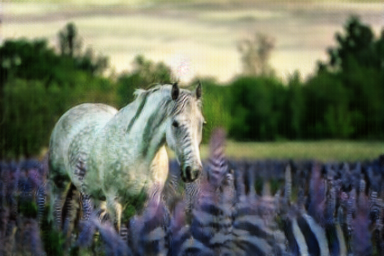

In [33]:
out_t1 = (batch_out1.data.squeeze() + 1.0) / 2.0
out_img1 = transforms.ToPILImage()(out_t1)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img1

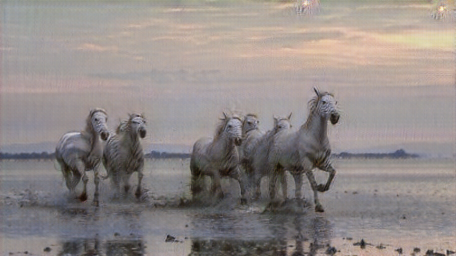

In [34]:
out_t2 = (batch_out2.data.squeeze() + 1.0) / 2.0
out_img2 = transforms.ToPILImage()(out_t2)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img2

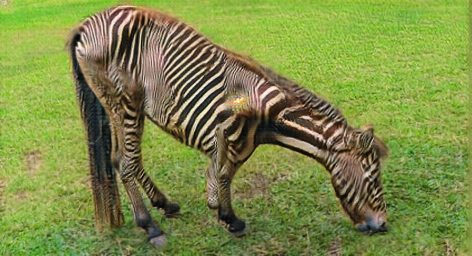

In [35]:
out_t3 = (batch_out3.data.squeeze() + 1.0) / 2.0
out_img3 = transforms.ToPILImage()(out_t3)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img3

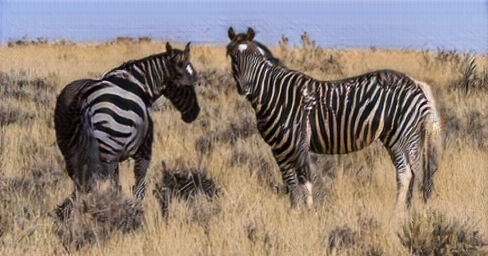

In [36]:
out_t4 = (batch_out4.data.squeeze() + 1.0) / 2.0
out_img4 = transforms.ToPILImage()(out_t4)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img4

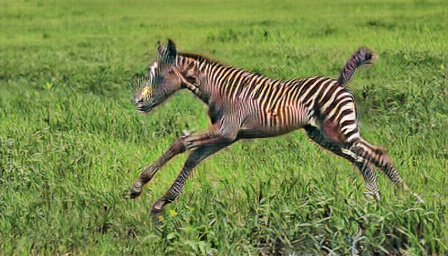

In [37]:
out_t5 = (batch_out5.data.squeeze() + 1.0) / 2.0
out_img5 = transforms.ToPILImage()(out_t5)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img5

Problem 3

In [ ]:
pip install ptflops

In [ ]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = models.resnet101()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

In [43]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = netG
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

ResNetGenerator(
  11.378 M, 100.000% Params, 43.555 GMac, 100.000% MACs, 
  (model): Sequential(
    11.378 M, 100.000% Params, 43.555 GMac, 100.000% MACs, 
    (0): ReflectionPad2d(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, (3, 3, 3, 3))
    (1): Conv2d(0.009 M, 0.083% Params, 0.475 GMac, 1.091% MACs, 3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(0.0 M, 0.000% Params, 0.003 GMac, 0.007% MACs, 64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(0.0 M, 0.000% Params, 0.003 GMac, 0.007% MACs, inplace=True)
    (4): Conv2d(0.074 M, 0.649% Params, 0.926 GMac, 2.127% MACs, 64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(0.0 M, 0.000% Params, 0.002 GMac, 0.004% MACs, 128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(0.0 M, 0.000% Params, 0.002 GMac, 0.004% MACs, inplace=True)
    (7): Conv2d(0.295 M, 2.594% Params, 0.926 GMac, 2.125% MACs, 128, 256, kernel_size=(3, 3)

Problem 4

In [44]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [45]:
from PIL import Image
img1 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo (1).jpg")
img2 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo (2).jpg")
img3 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo (3).jpg")
img4 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo (4).jpg")
img5 = Image.open("../content/drive/MyDrive/ColabNotebooks/data/external-content.duckduckgo.jpg")

In [46]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [47]:
img_t1 = preprocess(img1)
img_t2 = preprocess(img2)
img_t3 = preprocess(img3)
img_t4 = preprocess(img4)
img_t5 = preprocess(img5)

In [52]:
batch_t1 = torch.unsqueeze(img_t1, 0).cuda()
batch_t2 = torch.unsqueeze(img_t2, 0).cuda()
batch_t3 = torch.unsqueeze(img_t3, 0).cuda()
batch_t4 = torch.unsqueeze(img_t4, 0).cuda()
batch_t5 = torch.unsqueeze(img_t5, 0).cuda()

model.to('cuda')

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [54]:
with torch.no_grad():
    output1 = model(batch_t1)
    output2 = model(batch_t2)
    output3 = model(batch_t3)
    output4 = model(batch_t4)
    output5 = model(batch_t5)

In [57]:
probabilities1 = torch.nn.functional.softmax(output1[0], dim=0)
probabilities2 = torch.nn.functional.softmax(output2[0], dim=0)
probabilities3 = torch.nn.functional.softmax(output3[0], dim=0)
probabilities4 = torch.nn.functional.softmax(output4[0], dim=0)
probabilities5 = torch.nn.functional.softmax(output5[0], dim=0)

In [59]:
with open('../content/drive/MyDrive/ColabNotebooks/data/imagenet_classes.txt') as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities1, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

park bench 0.7726132869720459
swing 0.01936221309006214
lakeside, lakeshore 0.016752278432250023
worm fence, snake fence, snake-rail fence, Virginia fence 0.012718531303107738
mailbox, letter box 0.006075813435018063


In [60]:
with open('../content/drive/MyDrive/ColabNotebooks/data/imagenet_classes.txt') as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities2, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

lakeside, lakeshore 0.2837527394294739
breakwater, groin, groyne, mole, bulwark, seawall, jetty 0.12118344753980637
seashore, coast, seacoast, sea-coast 0.05133300647139549
valley, vale 0.04976670816540718
black swan, Cygnus atratus 0.04838934540748596


In [61]:
with open('../content/drive/MyDrive/ColabNotebooks/data/imagenet_classes.txt') as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities3, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

kite 0.9443665742874146
bald eagle, American eagle, Haliaeetus leucocephalus 0.024818111211061478
vulture 0.021200397983193398
ruffed grouse, partridge, Bonasa umbellus 0.0031489196699112654
partridge 0.0016847704537212849


In [62]:
with open('../content/drive/MyDrive/ColabNotebooks/data/imagenet_classes.txt') as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities4, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed, Samoyede 0.8423460125923157
white wolf, Arctic wolf, Canis lupus tundrarum 0.15196427702903748
Eskimo dog, husky 0.003265436738729477
Arctic fox, white fox, Alopex lagopus 0.0004707157495431602
timber wolf, grey wolf, gray wolf, Canis lupus 0.0002652125549502671


In [63]:
with open('../content/drive/MyDrive/ColabNotebooks/data/imagenet_classes.txt') as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities5, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

valley, vale 0.36687690019607544
volcano 0.11866089701652527
lakeside, lakeshore 0.053372740745544434
alp 0.04600239172577858
suspension bridge 0.03906086087226868


In [67]:
with torch.cuda.device(0):
  net = models.mobilenet_v2()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

MobileNetV2(
  3.505 M, 100.000% Params, 0.32 GMac, 100.000% MACs, 
  (features): Sequential(
    2.224 M, 63.451% Params, 0.319 GMac, 99.600% MACs, 
    (0): ConvNormActivation(
      0.001 M, 0.026% Params, 0.012 GMac, 3.760% MACs, 
      (0): Conv2d(0.001 M, 0.025% Params, 0.011 GMac, 3.384% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(0.0 M, 0.002% Params, 0.001 GMac, 0.251% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(0.0 M, 0.000% Params, 0.0 GMac, 0.125% MACs, inplace=True)
    )
    (1): InvertedResidual(
      0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
      (conv): Sequential(
        0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
        (0): ConvNormActivation(
          0.0 M, 0.010% Params, 0.005 GMac, 1.504% MACs, 
          (0): Conv2d(0.0 M, 0.008% Params, 0.004 GMac, 1.128% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)